# Model Analysis

This notebook is a toy example of analysis you can perform on a single checkpoint model

In [1]:
# Downloading data
from dlip.data.usps import download_usps

path = "../data/raw/"
download_usps(path)

In [2]:
# Loading checkpoint

from dlip.models.models import LinearModel, load_model

path_checkpoint = "../outputs/2024-01-18/21-03-04/checkpoint.pt"
input_size = 16 * 16
output_size = 10
model = load_model(
    path_checkpoint, LinearModel, input_size=input_size, output_size=output_size
)

In [5]:
# Calculate the accuracy to evaluate the model

from dlip.data.data import load_dataset
from dlip.models.evaluation import accuracy

train_set, val_set = load_dataset("../data/raw/")

accuracy(dataset=train_set, model=model)
accuracy(dataset=val_set, model=model)

Accuracy of the model : 92.75 %
Accuracy of the model : 92.33 %


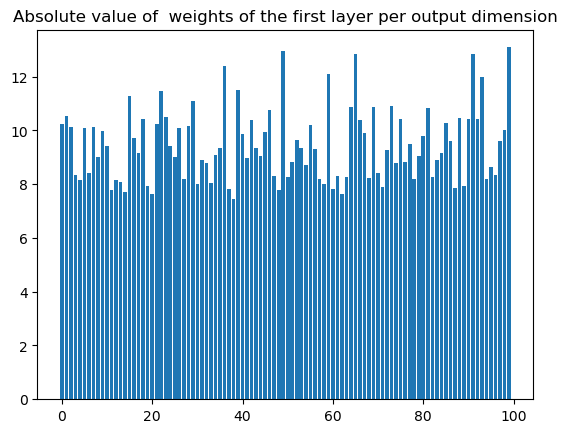

In [23]:
# Plot the value of the weights of the first layer
import matplotlib.pyplot as plt
import torch

weights = model.l1.weight.detach()

plt.bar(range(100), torch.abs(weights).sum(dim=1))
plt.title("Sum of Absolute value of weights of the first layer per output dimension")
plt.show()